# Predicting Song Popularity

This project's objective is to forecast a song's popularity by examining how various independent variables influence its overall appeal.
The dataset was taken from Kaggle and contained data on around 19000 songs.



### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import pickle
import xgboost as xgb 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
import warnings
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
warnings.filterwarnings("ignore")

### EDA and preprocessing

In [2]:
sg_dat=pd.read_csv('song_data.csv')

In [3]:
sg_dat.head()

song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294  167.060               4          0.474  
1    -6.407           0       0.0498  105.256               4          0.370  
2    -7.828           1       0.0792  123.881               4          0.324  
3    -4.938           1       0.1070  122.444               4          0.198  
4    -5.065           1       0.0313  172.011               4          0.574

In [4]:
sg_dat.describe()

song_popularity  song_duration_ms  acousticness  danceability  \
count     18835.000000      1.883500e+04  18835.000000  18835.000000   
mean         52.991877      2.182116e+05      0.258539      0.633348   
std          21.905654      5.988754e+04      0.288719      0.156723   
min           0.000000      1.200000e+04      0.000001      0.000000   
25%          40.000000      1.843395e+05      0.024100      0.533000   
50%          56.000000      2.113060e+05      0.132000      0.645000   
75%          69.000000      2.428440e+05      0.424000      0.748000   
max         100.000000      1.799346e+06      0.996000      0.987000   

             energy  instrumentalness           key      liveness  \
count  18835.000000      18835.000000  18835.000000  18835.000000   
mean       0.644995          0.078008      5.289196      0.179650   
std        0.214101          0.221591      3.614595      0.143984   
min        0.001070          0.000000      0.000000      0.010900   
25%        0.510000          0.000000      2.000000      0.092900   
50%        0.674000          0.000011      5.000000      0.122000   
75%        0.815000          0.002570      8.000000      0.221000   
max        0.999000          0.997000     11.000000      0.986000   

           loudness    audio_mode   speechiness         tempo  time_signature  \
count  18835.000000  18835.000000  18835.000000  18835.000000    18835.000000   
mean      -7.447435      0.628139      0.102099    121.073154        3.959119   
std        3.827831      0.483314      0.104378     28.714456        0.298533   
min      -38.768000      0.000000      0.000000      0.000000        0.000000   
25%       -9.044000      0.000000      0.037800     98.368000        4.000000   
50%       -6.555000      1.000000      0.055500    120.013000        4.000000   
75%       -4.908000      1.000000      0.119000    139.931000        4.000000   
max        1.585000      1.000000      0.941000    242.318000        5.000000   

       audio_valence  
count   18835.000000  
mean        0.527967  
std         0.244632  
min         0.000000  
25%         0.335000  
50%         0.527000  
75%         0.725000  
max         0.984000

In [5]:
sg_dat.shape

(18835, 15)

In [6]:
sg_dat.info

<bound method DataFrame.info of                         song_name  song_popularity  song_duration_ms  \
0      Boulevard of Broken Dreams               73            262333   
1                      In The End               66            216933   
2               Seven Nation Army               76            231733   
3                      By The Way               74            216933   
4               How You Remind Me               56            223826   
...                           ...              ...               ...   
18830              Let It Breathe               60            159645   
18831                     Answers               60            205666   
18832      Sudden Love (Acoustic)               23            182211   
18833           Gentle on My Mind               55            352280   
18834                    Up to Me               60            193533   

       acousticness  danceability  energy  instrumentalness  key  liveness  \
0          0.005520      

In [7]:
null_values = sg_dat.isnull().sum()
print(null_values)

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64


### dropping unused variables

In [8]:
dataset=sg_dat.drop(['song_name','song_duration_ms','key','audio_mode','time_signature'],axis=1)

In [9]:
dataset.head()

song_popularity  acousticness  danceability  energy  instrumentalness  \
0               73      0.005520         0.496   0.682          0.000029   
1               66      0.010300         0.542   0.853          0.000000   
2               76      0.008170         0.737   0.463          0.447000   
3               74      0.026400         0.451   0.970          0.003550   
4               56      0.000954         0.447   0.766          0.000000   

   liveness  loudness  speechiness    tempo  audio_valence  
0    0.0589    -4.095       0.0294  167.060          0.474  
1    0.1080    -6.407       0.0498  105.256          0.370  
2    0.2550    -7.828       0.0792  123.881          0.324  
3    0.1020    -4.938       0.1070  122.444          0.198  
4    0.1130    -5.065       0.0313  172.011          0.574

array([[<Axes: title={'center': 'song_popularity'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'audio_valence'}>, <Axes: >, <Axes: >]],
      dtype=object)

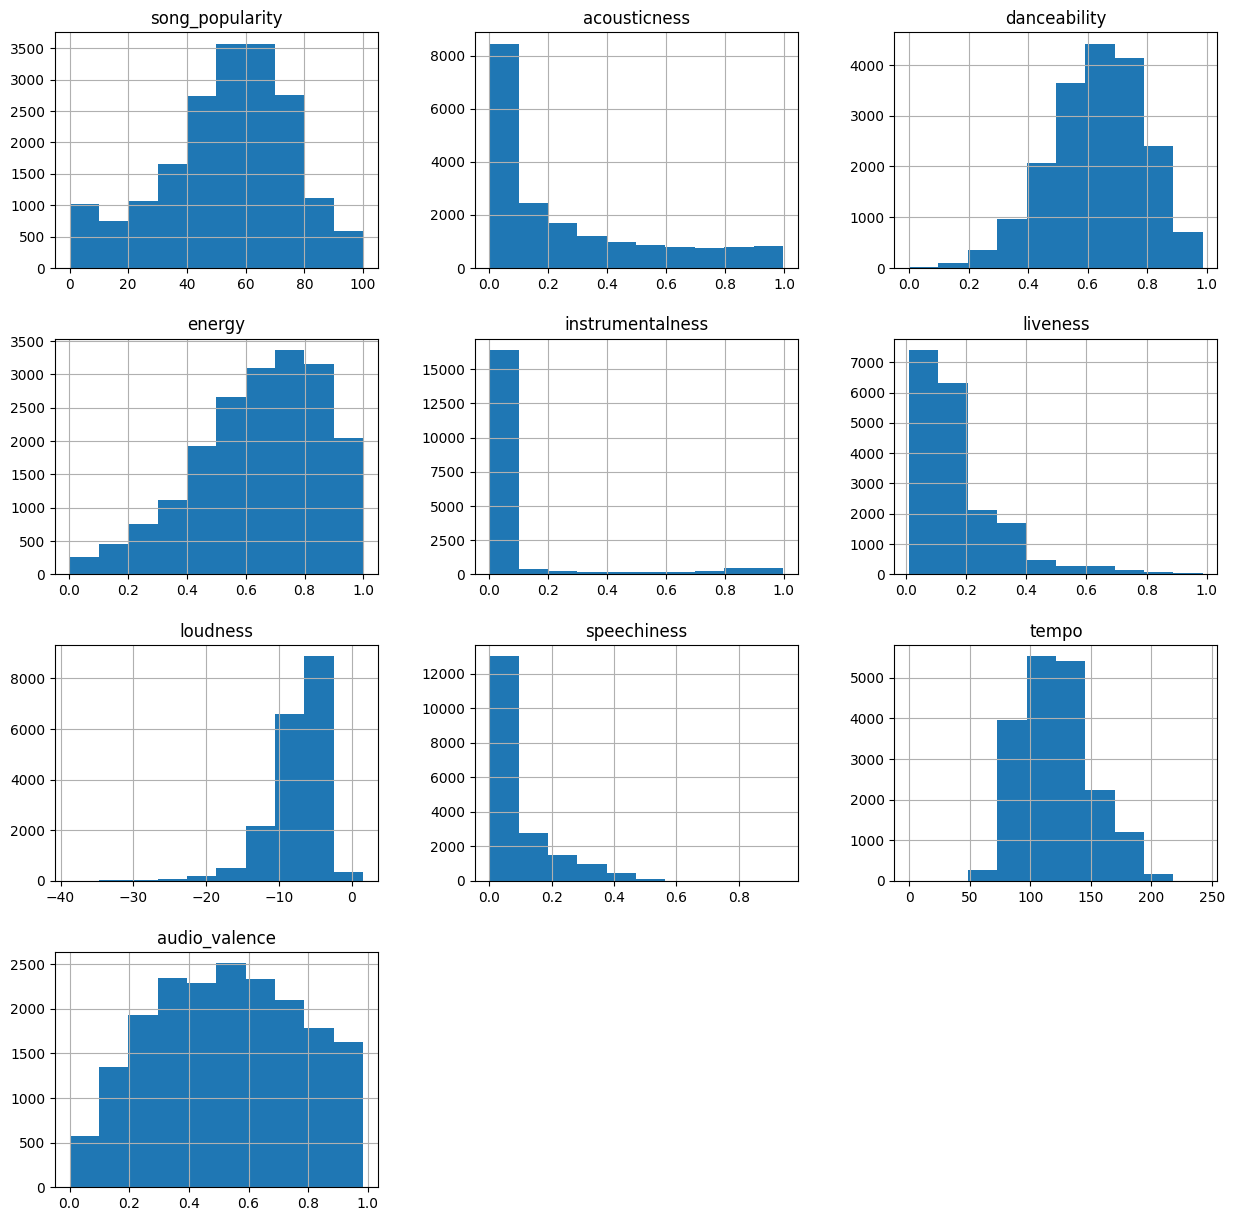

In [10]:
dataset.hist(figsize=(15,15))

Some features are normally distributed, for others we can consider transformation.

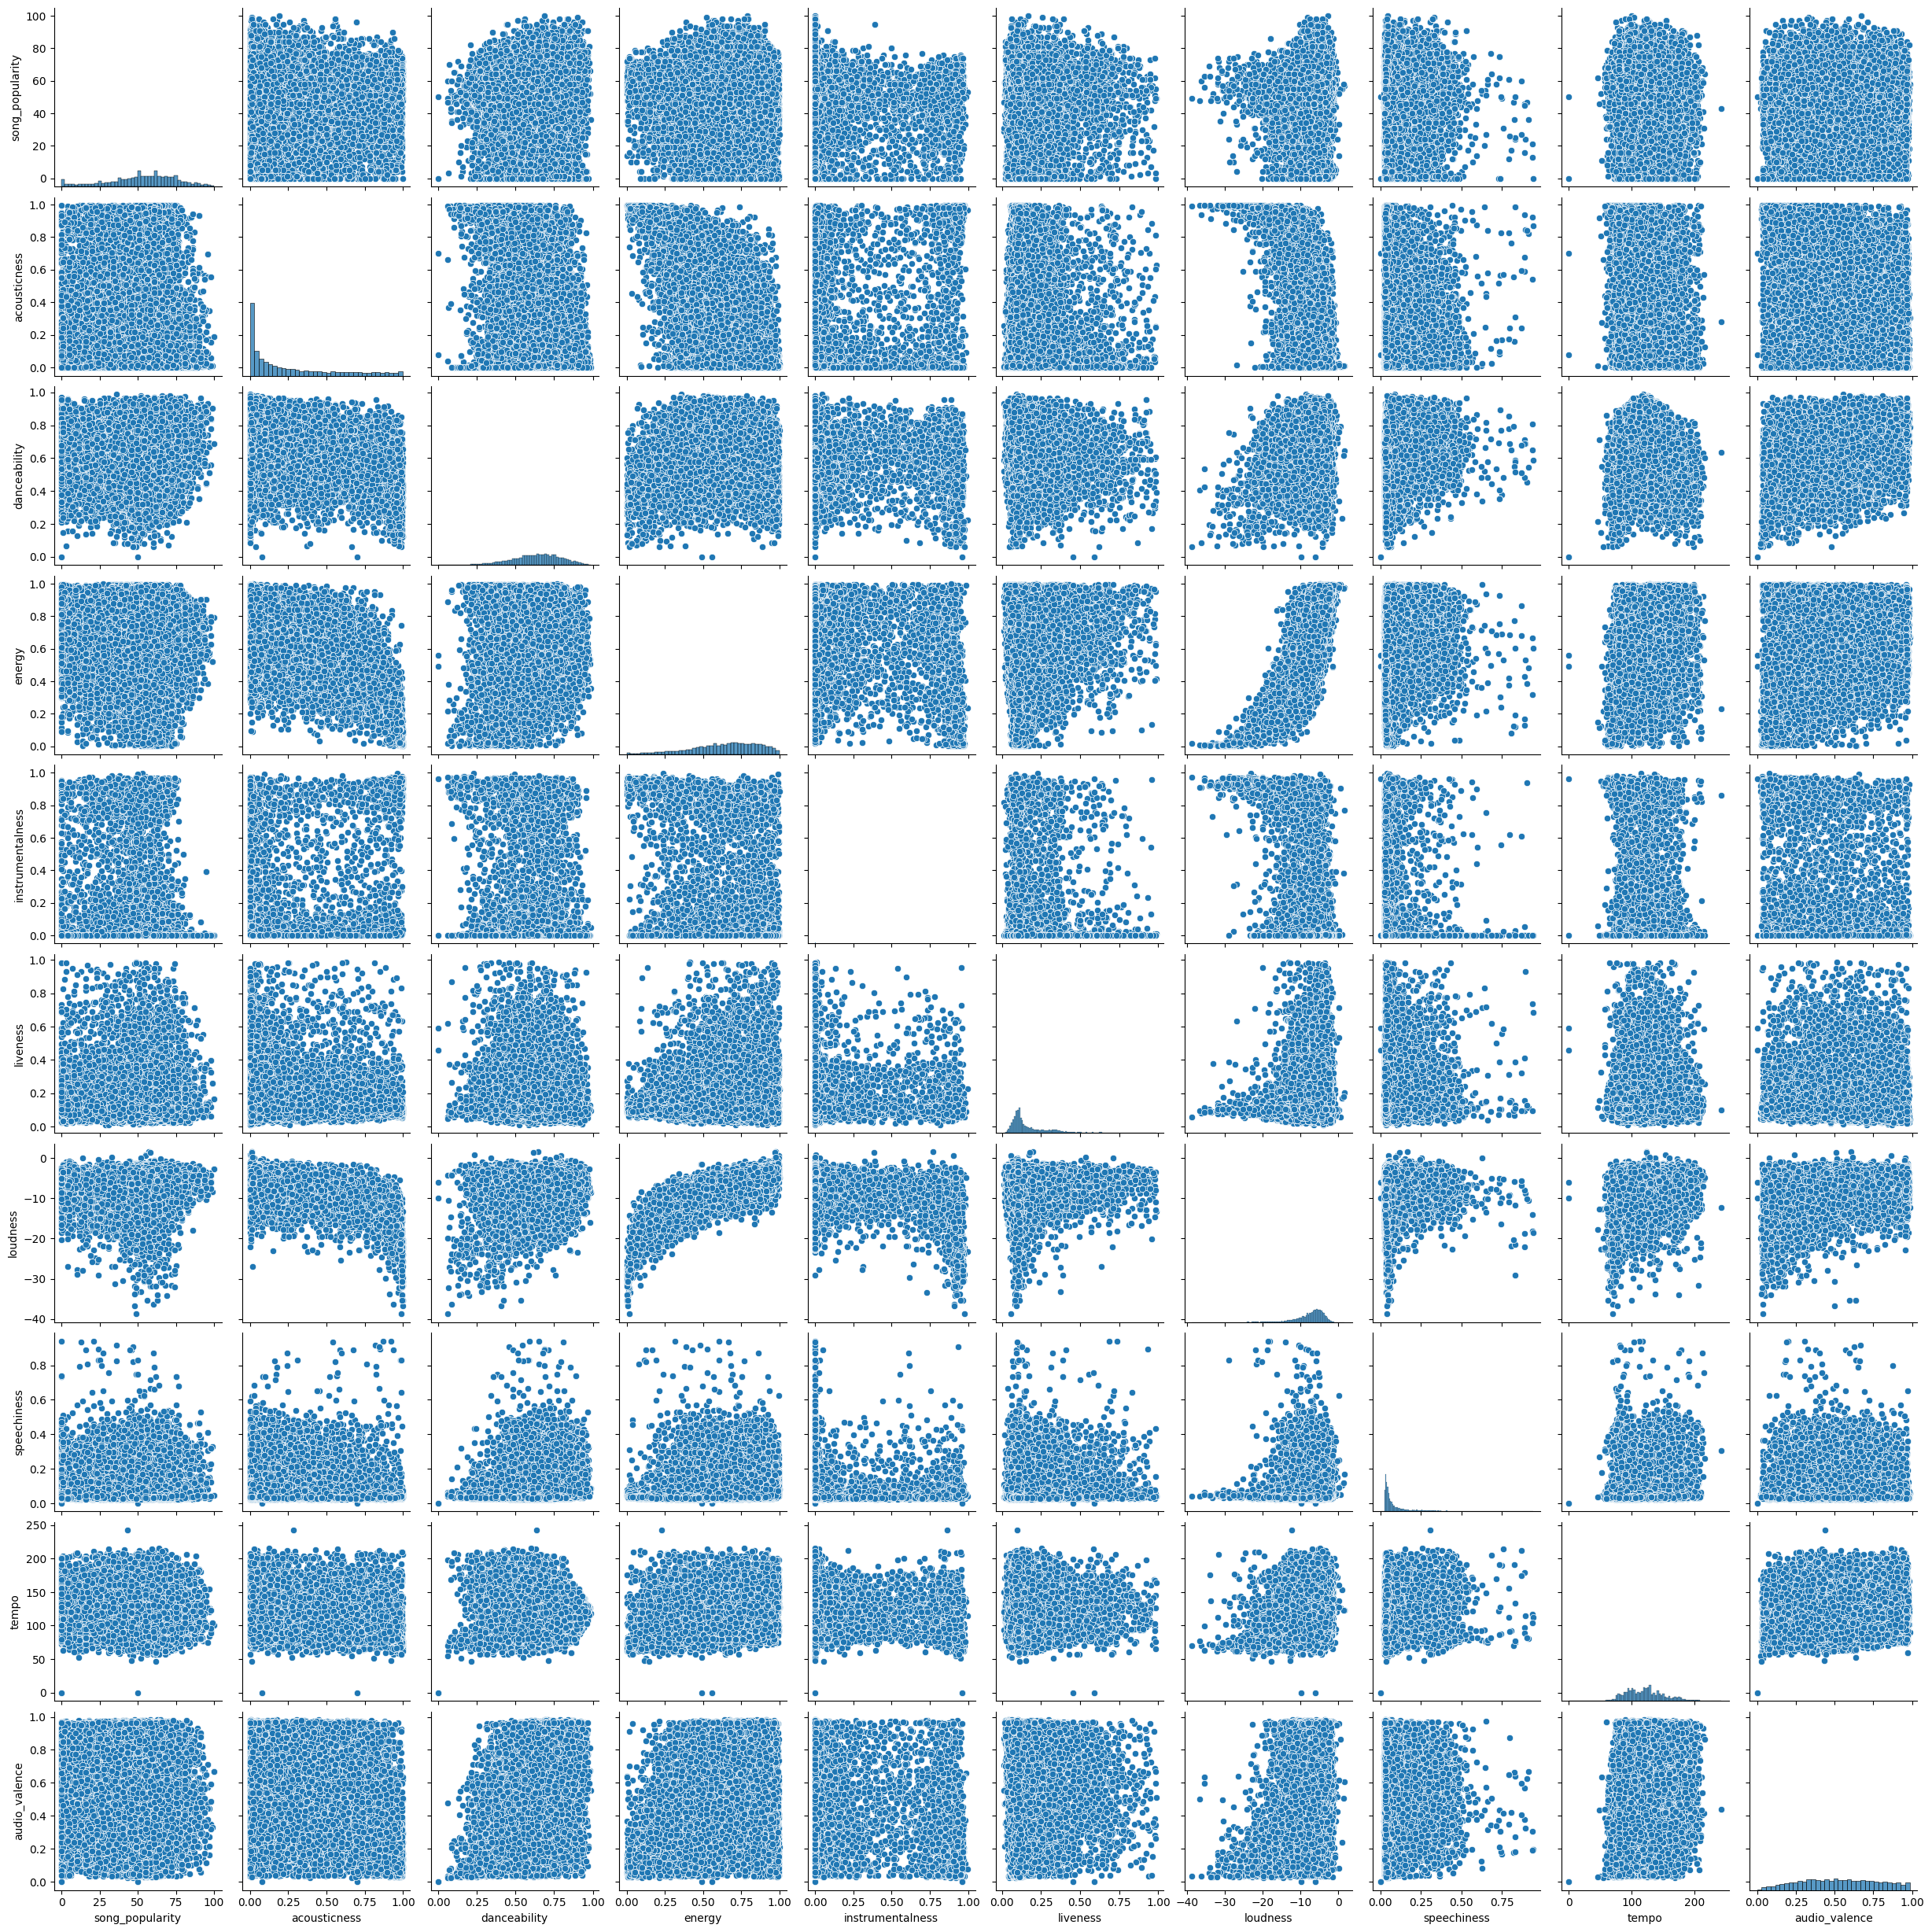

In [11]:
sns.pairplot(dataset)

The relationship between features and target (popularity) appears to be mostly non-linear, we can consider polynomial transformations.

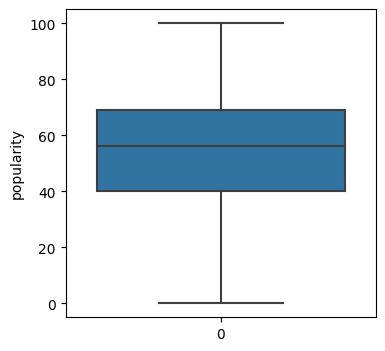

In [12]:
plt.figure(figsize=(4,4))
sns.boxplot(dataset['song_popularity'])
plt.ylabel("popularity")
plt.show()

<Axes: ylabel='Frequency'>

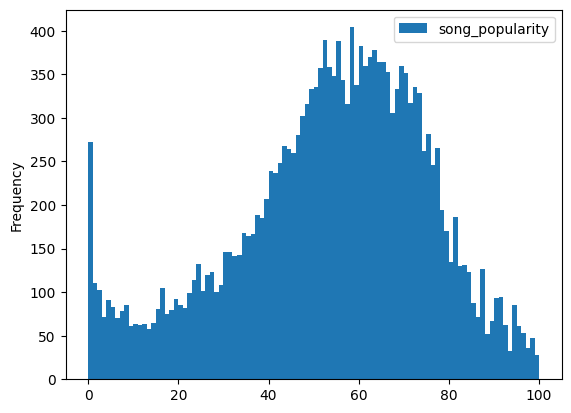

In [13]:
dataset['song_popularity'].plot.hist(bins=100,legend=True)

There is high frequency of songs with low popularity, we can consider trimming it.

In [73]:
dataset[dataset['song_popularity']<8].count()

song_popularity     0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
audio_valence       0
dtype: int64

In [74]:
dataset=dataset[(dataset['song_popularity']>9)]

<Axes: ylabel='Frequency'>

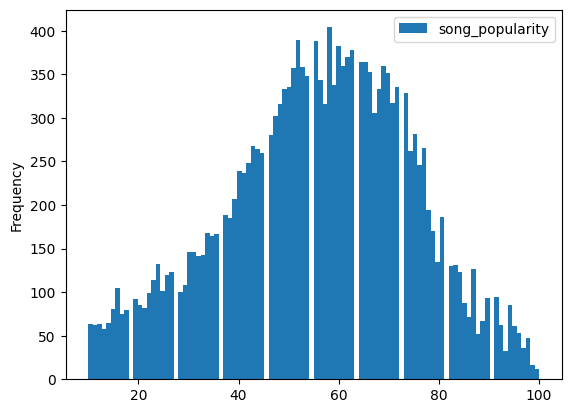

In [75]:
dataset['song_popularity'].plot.hist(bins=100,legend=True)

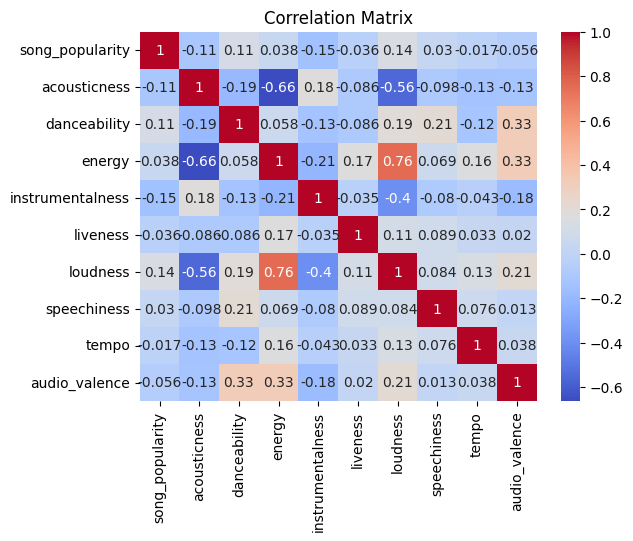

In [76]:
correlation_matrix=dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Here energy, loudness and acoustics are correlated, we can consider selecting only one of the features to reduce data redundancy and also retain important information. Also, no feature appears to be correlated with popularity alone. Also instrumentalness and speechiness for more than 12000 songs lie between 0 and 0.1. We can consider to drop these for now.

I have now selected 5 features for further analysis :  
  *  energy
  *  tempo
  *  audio_valence
  *  danceability
  *  liveness

In [77]:
features_to_transform=['energy','tempo','audio_valence','danceability','liveness']
polynomial_features= PolynomialFeatures(degree=1)
x_poly=polynomial_features.fit(dataset[features_to_transform])
x_poly_df=pd.DataFrame(x_poly.transform(dataset[features_to_transform]),columns=x_poly.get_feature_names_out(dataset[features_to_transform].columns))

In [78]:
x_poly_df.drop(columns=['energy','tempo','audio_valence','danceability','liveness'],inplace=True)

In [79]:
x_poly_df.shape

(17809, 1)

In [80]:
dataSel=dataset[['energy','tempo','audio_valence','danceability','liveness','song_popularity']]
data3=pd.concat([dataSel,x_poly_df],axis=1)

In [81]:
data3.head()

energy    tempo  audio_valence  danceability  liveness  song_popularity  \
0   0.682  167.060          0.474         0.496    0.0589             73.0   
1   0.853  105.256          0.370         0.542    0.1080             66.0   
2   0.463  123.881          0.324         0.737    0.2550             76.0   
3   0.970  122.444          0.198         0.451    0.1020             74.0   
4   0.766  172.011          0.574         0.447    0.1130             56.0   

     1  
0  1.0  
1  1.0  
2  1.0  
3  1.0  
4  1.0

In [82]:
data3.drop(columns=['1'],inplace=True)

In [83]:
data3.head()
data3.isnull().sum()


energy             957
tempo              957
audio_valence      957
danceability       957
liveness           957
song_popularity    957
dtype: int64

In [84]:
data3.dropna(inplace=True)

In [85]:
target_final=data3['song_popularity']
features_final=data3.drop(columns='song_popularity')

In [86]:
x_train, x_test, y_train, y_test = train_test_split(features_final, target_final, random_state=51,test_size=0.3)

In [87]:
scaler1 = StandardScaler()
scaler1.fit(x_train)
x_train_scaled =pd.DataFrame(data=scaler1.transform(x_train), columns=features_final.columns)
x_test_scaled =pd.DataFrame(data=scaler1.transform(x_test), columns=features_final.columns)
scaler1.transform([[0.682,167.06,0.474,0.496,0.05]])

array([[ 0.18079868,  1.59739543, -0.22340855, -0.89097143, -0.90231902]])

Pickling the Scaler for API use

In [88]:
pkl_file="scaler.pkl"
with open(pkl_file,'wb') as file:
    pickle.dump(scaler1,file)

In [89]:
myscaler2=pickle.load(open('scaler.pkl','rb'))

### Linear regression
Linear regression is a statistical method used for modeling the relationship between a dependent variable and one or more independent variables. It assumes that there is a linear relationship between the variables, meaning the change in the dependent variable is directly proportional to the change in the independent variables. The goal of linear regression is to find the best-fitting line (or hyperplane in higher dimensions) that minimizes the difference between the predicted values and the actual data points.

In [30]:
lm = LinearRegression()

In [31]:
x_train_scaled.isnull().sum()

energy           0
tempo            0
audio_valence    0
danceability     0
liveness         0
dtype: int64

In [32]:
lm.fit(x_train_scaled,y_train)

LinearRegression()

In [33]:
y_predict = lm.predict(x_test_scaled)

In [34]:
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
rmse = mean_squared_error(y_test, y_predict,squared=False)
print(f"MSE: {mse}" )
print(f"R2: {r2}" )
print(f"MAE: {mae}" )
print(f"RMSE: {rmse}" )

MSE: 340.3051300842306
R2: 0.03257651714432386
MAE: 14.994521484717499
RMSE: 18.447361060168756


In [35]:
lm.coef_

array([ 1.39842562,  0.04864199, -2.41522945,  2.64806358, -0.55092552])

#### XGboost Regression

1) Regularization: XGBoost uses regularization techniques to prevent overfitting and improve generalization.

2) Handling missing values: XGBoost can automatically handle missing values in the dataset, reducing the need for data preprocessing.

3) Feature importance: XGBoost provides insights into the importance of features in the prediction task, helping to identify the most influential variables.

4) Handling imbalanced datasets: XGBoost includes strategies to handle imbalanced datasets, where the number of instances in different classes is disproportionate.

5) Scalability: XGBoost is designed for efficiency and scalability, making it suitable for large datasets and parallel processing.

In [36]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.9, learning_rate = 0.1,max_depth = 20, alpha = 0.001, n_estimators = 100)

In [37]:
xg_reg.fit(x_train_scaled,y_train)

XGBRegressor(alpha=0.001, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [38]:
pred = xg_reg.predict(x_test_scaled) 

In [39]:
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = mean_squared_error(y_test, pred,squared=False)
print(f"MSE: {mse}" )
print(f"R2: {r2}" )
print(f"MAE: {mae}" )
print(f"RMSE: {rmse}" )

MSE: 221.84841593515685
R2: 0.3693266770416239
MAE: 10.328843346298935
RMSE: 14.894576728969403


### Additional Regression Models

- the goal of the project was to build a linear regression model but I wanted to see if different regression models would work better with my data 

### Random Forest Regressor
Random Forest Regressor is a powerful machine learning algorithm that belongs to the ensemble learning family. It is an extension of the Random Forest algorithm, which is primarily used for classification tasks. The Random Forest Regressor, on the other hand, is specifically designed for regression tasks, where the goal is to predict continuous numerical values rather than discrete classes.

In [40]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=51)
random_forest.fit(x_train_scaled,y_train)
y_rf = random_forest.predict(x_test_scaled)

In [41]:
mse = mean_squared_error(y_test, y_rf)
r2 = r2_score(y_test, y_rf)
mae = mean_absolute_error(y_test, y_rf)
rmse = mean_squared_error(y_test, y_rf, squared=False)
print(f"MSE: {mse}" )
print(f"R2: {r2}" )
print(f"MAE: {mae}" )
print(f"RMSE: {rmse}" )

MSE: 217.29248430186485
R2: 0.3822783338304616
MAE: 10.861996456993204
RMSE: 14.740844083764838


### Regression with transformed variables
I wanted to see if transforming the variables and creating interactions between them would improve the results or not

In [42]:
features_to_transform=['energy','tempo','audio_valence','danceability','liveness']
polynomial_features= PolynomialFeatures(degree=2)
x_poly=polynomial_features.fit(dataset[features_to_transform])
x_poly_df=pd.DataFrame(x_poly.transform(dataset[features_to_transform]),columns=x_poly.get_feature_names_out(dataset[features_to_transform].columns))

In [43]:
x_poly_df.drop(columns=['energy','tempo','audio_valence','danceability','liveness'],inplace=True)

In [44]:
dataSel=dataset[['energy','tempo','audio_valence','danceability','liveness','song_popularity']]
data3=pd.concat([dataSel,x_poly_df],axis=1)

In [45]:
data3.dropna(inplace=True)

In [46]:
target_final=data3['song_popularity']
features_final=data3.drop(columns='song_popularity')

In [47]:
x_train, x_test, y_train, y_test = train_test_split(features_final, target_final, random_state=51,test_size=0.3)

In [48]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled =pd.DataFrame(data=scaler.transform(x_train), columns=features_final.columns)
x_test_scaled =pd.DataFrame(data=scaler.transform(x_test), columns=features_final.columns)

In [49]:
lm2 = LinearRegression()
lm2.fit(x_train_scaled,y_train)

LinearRegression()

In [50]:
y_predict = lm2.predict(x_test_scaled)

In [51]:
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
rmse = mean_squared_error(y_test, y_predict,squared=False)
print(f"MSE: {mse}" )
print(f"R2: {r2}" )
print(f"MAE: {mae}" )
print(f"RMSE: {rmse}" )

MSE: 341.1168356998573
R2: 0.03347475459024518
MAE: 15.00664202350591
RMSE: 18.469348545627085


In [52]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.9, learning_rate = 0.1,max_depth = 20, alpha = 0.001, n_estimators = 100)

In [53]:
xg_reg.fit(x_train_scaled,y_train)

XGBRegressor(alpha=0.001, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [54]:
pred = xg_reg.predict(x_test_scaled) 

In [55]:
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = mean_squared_error(y_test, pred,squared=False)
print(f"MSE: {mse}" )
print(f"R2: {r2}" )
print(f"MAE: {mae}" )
print(f"RMSE: {rmse}" )

MSE: 289.8034222812099
R2: 0.17886690269550254
MAE: 13.818646565645556
RMSE: 17.023613666939518


### Conclusion
My song popularity predictor is not very accurate; I was only able to achieve an R-square value of 0.382 with the random forest regressor, implying only 38% of the dataset could be explained by the model. Also for what it's worth in the linear regression model energy and danceability were the most positive contributor to a song's popularity.

I also tried polynomial transformation of the features and creating interactions between them. However, with the transformation, I could only achieve an R-square value of 0.1788 with xgboost regression.

To further increase the accuracy of the model we can try more degrees of polynomial transformation to make more meaningful interactions between the features as no feature showed a linear relationship with popularity on its own.

Further, we can also try some other ML models.

### Pickling the model to demonstrate API use
I will be using flask api with the pickle file and then sending post request to the flask server from react frontend, to which in response the server will send the predicted popularity score.

Pickling the ranforest regressor as it was the most accurate one

In [56]:
pkl_file="ranForest.pkl"
with open(pkl_file,'wb') as file:
    pickle.dump(random_forest,file)

In [57]:
with open ('ranForest.pkl','rb') as file:
    myModel=pickle.load(file)

In [59]:
print(x_test_scaled)

        energy     tempo  audio_valence  danceability  liveness    1  \
0     1.219061  1.876562      -1.283826     -1.853020 -0.084424  0.0   
1    -0.408196 -0.771224       0.096540      0.610459 -0.215814  0.0   
2    -1.816309 -1.403415      -0.567019     -0.825507 -0.672911  0.0   
3     1.536119  0.651961      -0.853742     -1.993426  0.212931  0.0   
4    -1.405998  0.502858      -1.418996     -0.353233 -0.374864  0.0   
...        ...       ...            ...           ...       ...  ...   
5051  1.027893  0.097486       0.248093      0.999766 -0.683284  0.0   
5052  0.598931  1.869712      -1.855224     -0.646809 -0.938456  0.0   
5053  0.762123 -0.909060       0.743714      1.746468  0.123033  0.0   
5054 -0.119113 -0.304201       0.555297     -0.525549 -0.899731  0.0   
5055  1.107158  1.349175       0.162076      0.048837 -0.181238  0.0   

      energy^2  energy tempo  energy audio_valence  energy danceability  ...  \
0     0.224271      0.553802              0.695638     

In [60]:
z=myModel.predict([[0.675652 ,0.193856,1.083723,-1.166636,1.820338]])

In [61]:
z

array([62.09])

In [62]:
z[0]

62.09